# The Housing price of Ames, Iowa, USA
This is my very first problem solving in the Regression space. Before this, it was all theory; and the very first realization was that, even in a friendly competition like this one in Kaggle, one has a lot to struggle and learn.

My humble admission is that I have learn a lot from other people's work.<br> 
However, I have also added a few perspective of mine. I hope some new-comer might be benefitted from my work that I am publishing.

Please feel free to use my notebook as a baseline and make more improvements on the same. Push your suggestions, comments to me as it is also my starting journey in the world of Data Science.<br>
Also, in case, you like some part of my work, please do upvote. Thank you in advance !

## The Goal
* Each row in the dataset describes the characteristics of a house.
* The characteristics is indicated/captured by 80 features e.g Neighborhood, Utilities, Landslope, Bedrooms, Kitchens, heating etc. (More fully available in the Data Description text file ) 
* Our goal is to predict the SalePrice, given these features.
* Our models are evaluated on the Root-Mean-Squared-Error (RMSE) between the log of the SalePrice predicted by our model, and the log of the actual SalePrice.

## Salient features of this work:
1. I used Visualization techniques in the Exploratory Data Analysis (EDA) stage to present the data in a concise manner so that a person can capture a good view of the data with very little scrolling. ***This give a good perspective or bird-eye view of the data***
2. In the Feature Engineering stage, I used a lot of generic techniques to fill the missing values. **Very little 'Hard-coding' has been used**. This will ensure that the notebood can be used on a different set of data whose data elements might be the same but the characteristics of the data is very different.
3. Lastly, in the model-fitting stage, I have used a wighted average of the models that are used. Since, the belended model provided a better RMSE score, I used that in teh final prediction of the price.

In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load in 

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the "../input/" directory.
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # Any results you write to the current directory are saved as output.

Creating  a new Worksheet after learing few new techniques from other notebooks that have been shared within the community. I have also worked on few improvisation over the learning from other notebook. 

### **First import the necessary libraries **

In [2]:
# Import section

import pandas as pd
import numpy as np

import seaborn as sns
import types
import pandas as pd
from botocore.client import Config
#import ibm_boto3

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Misc
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from datetime import datetime

pd.set_option('display.max_columns', None)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

Read the Training dataset into a dataframe

In [3]:
trainDf = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [4]:
trainDf.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

Next read the Test dataset into another Dataframe

In [5]:
testDf = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [6]:
testDf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# 1. Exploratory Data Analysis (EDA)

## 1.1 Target Attribute (SalePrice) Observation

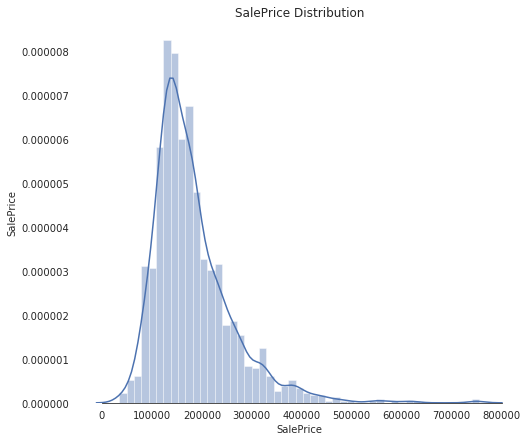

In [7]:
# First let us look at the Target and plot it visually
import matplotlib.pyplot as plt

sns.set_style ("white")
sns.set_color_codes (palette = 'deep')
f, ax = plt.subplots (figsize=(8, 7))

sns.distplot (trainDf['SalePrice'], color='b')
ax.xaxis.grid =False
ax.set (ylabel='Frequency' )
ax.set (ylabel='SalePrice' )
ax.set (title = 'SalePrice Distribution')
sns.despine(trim=True, left=True)
plt.show()

In [8]:
# Skewness and Kurtosis

print ("Skewness of Data : %.2f" % trainDf['SalePrice'].skew())
print ("Kurtosis of Data : %.2f" % trainDf['SalePrice'].kurt())

Skewness of Data : 1.88
Kurtosis of Data : 6.54


**Observation** : The data distribution is skewed towards Right. In other words, the tail is towards the right

## 1.2 Feature Observation

Let us observe some of the features in the training dataset

In [9]:
pd.set_option('display.float_format', lambda x: '%.2f' %x)
trainDf.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.00,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1379.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,730.50,56.90,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,567.24,1057.43,1162.63,346.99,5.84,1515.46,0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,1978.51,1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.20
std,421.61,42.30,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,24.69,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.50
min,1.00,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,365.75,20.00,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,1129.50,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1961.00,1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.00
50%,730.50,50.00,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,477.50,991.50,1087.00,0.00,0.00,1464.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1980.00,2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.00
75%,1095.25,70.00,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,808.00,1298.25,1391.25,728.00,0.00,1776.75,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2002.00,2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
max,1460.00,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,2336.00,6110.00,4692.00,2065.00,572.00,5642.00,3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,2010.00,4.00,1418.00,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.00


In [10]:
trainDf.describe(include = ['object'], exclude = ['int', 'float'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


**Observation**:<br>
The attributes **Street**, **Utilities**, **Condition2**, **RoofMatl**, **Heating** have very ***little variation***. Most of the data is in one category. Suspicion is that they might cause undue influence on the model.

### Let us now observe how the SalePrice is related/influenced to some of the Features.<br>
Let us start with two Features namely OverallQual and OverallCond

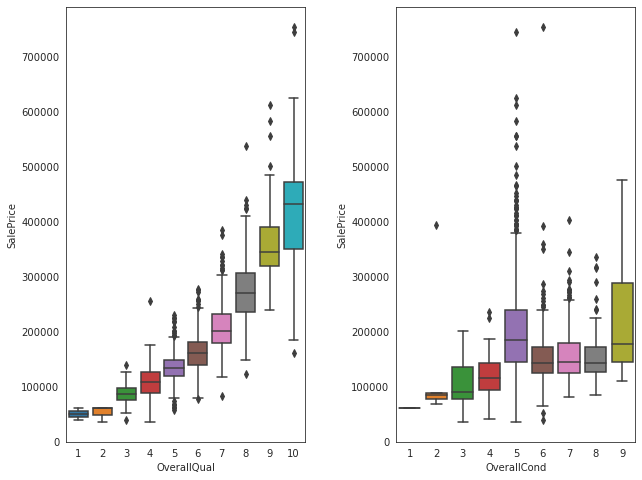

In [11]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(10, 8))
fig.tight_layout(pad=6.0)
sns.boxplot(x='OverallQual', y='SalePrice', data=trainDf, orient='v', ax=axes[0])
sns.boxplot(x='OverallCond', y='SalePrice', data=trainDf, orient='v', ax=axes[1])

**Observation** :The feature OverallQual has less of overlaps but OverallCond have more overlap between the categories
Also, in OverallCond, for the value 5, we have huge outliers

Let us observe the Numeric features. Some Numeric can be continuous and some will be Categorical

In [12]:
NumericColumns = trainDf.select_dtypes([np.int16, np.int32, np.int64, np.float16, np.float32, np.float64]).columns
NumericColumns
FeaturePlot = NumericColumns.drop([ 'SalePrice'])

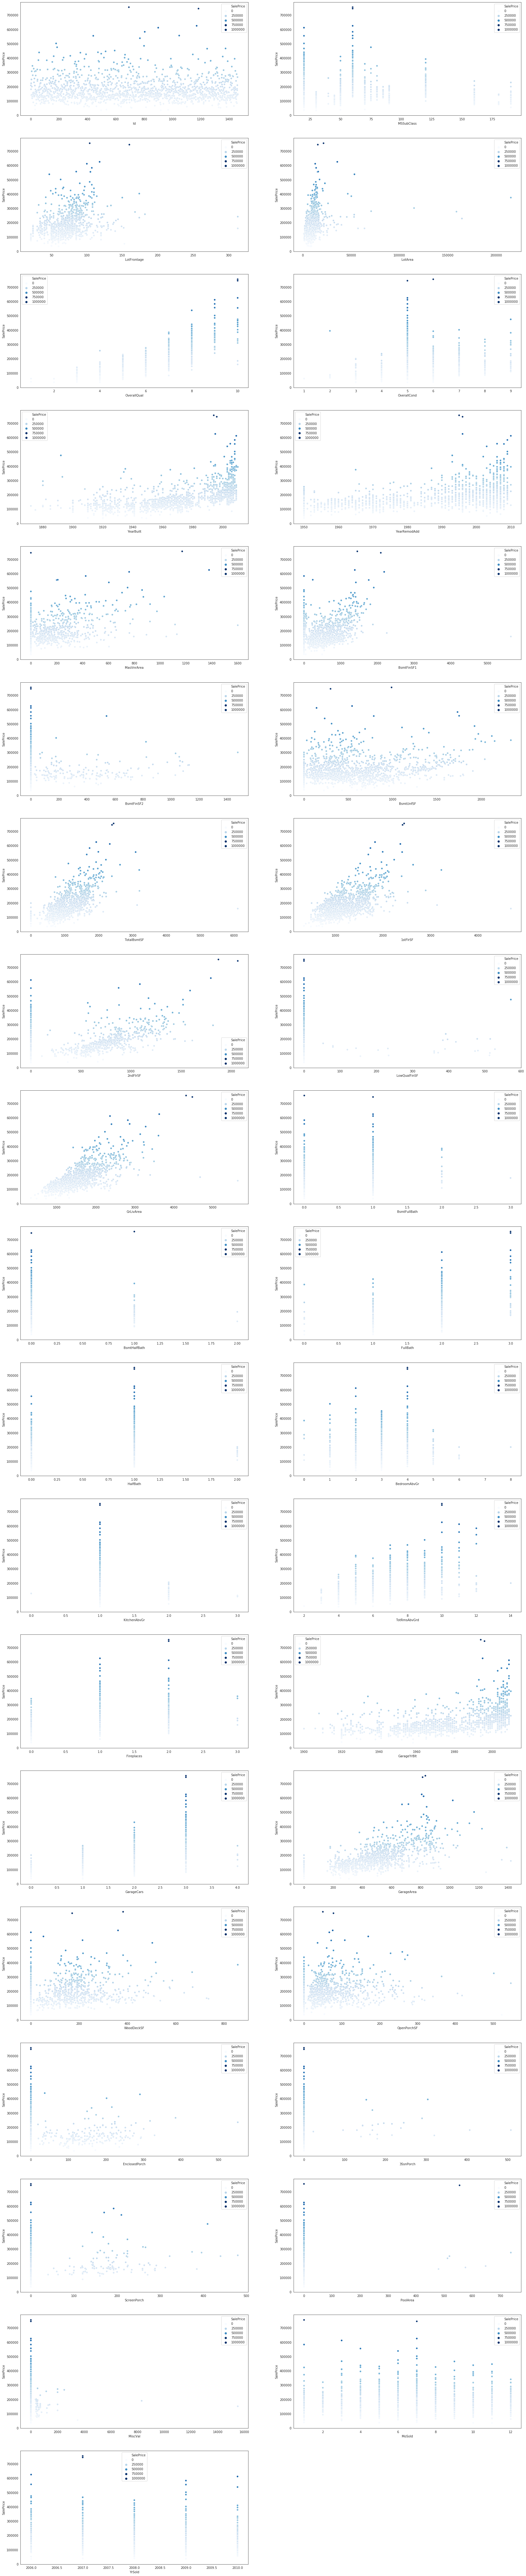

In [13]:
ColumnDisplay = 2
fig, axex = plt.subplots( ncols=ColumnDisplay, nrows=0, figsize=(12,120) )

plt.subplots_adjust (top=2, right=2)
sns.color_palette ('husl', 8)
for i, feature in enumerate (list(trainDf[FeaturePlot]), 1) :
    plt.subplot (len(list(FeaturePlot)), ColumnDisplay, i )
    sns.scatterplot (x=feature, y='SalePrice', data=trainDf, hue='SalePrice', palette='Blues')

**Key Observations**
The belowFeatures appear to be Categorical and not Continuous

<li>MSSubClass</li>
<li>OverallQual</li>
<li>OverallCond</li>
<li>LowQualFinSF</li>
<li>BsmtFullBath</li>
<li>BsmtHalfBath</li>
<li>FullBath</li>
<li>HalfBath</li>
<li>BedroomAbvGr</li>
<li>KitchenAbvGr</li>
<li>TotalRmsAbvGnd</li>
<li>Fireplaces</li>
<li>GarageCars</li>
<li>MoSold</li>
<li>YrSold</li>

In [14]:
CategoricColumns = trainDf.select_dtypes([np.object]).columns
#CategoricColumns

Let us visualize the Categorical Features especially that are of type Object/String

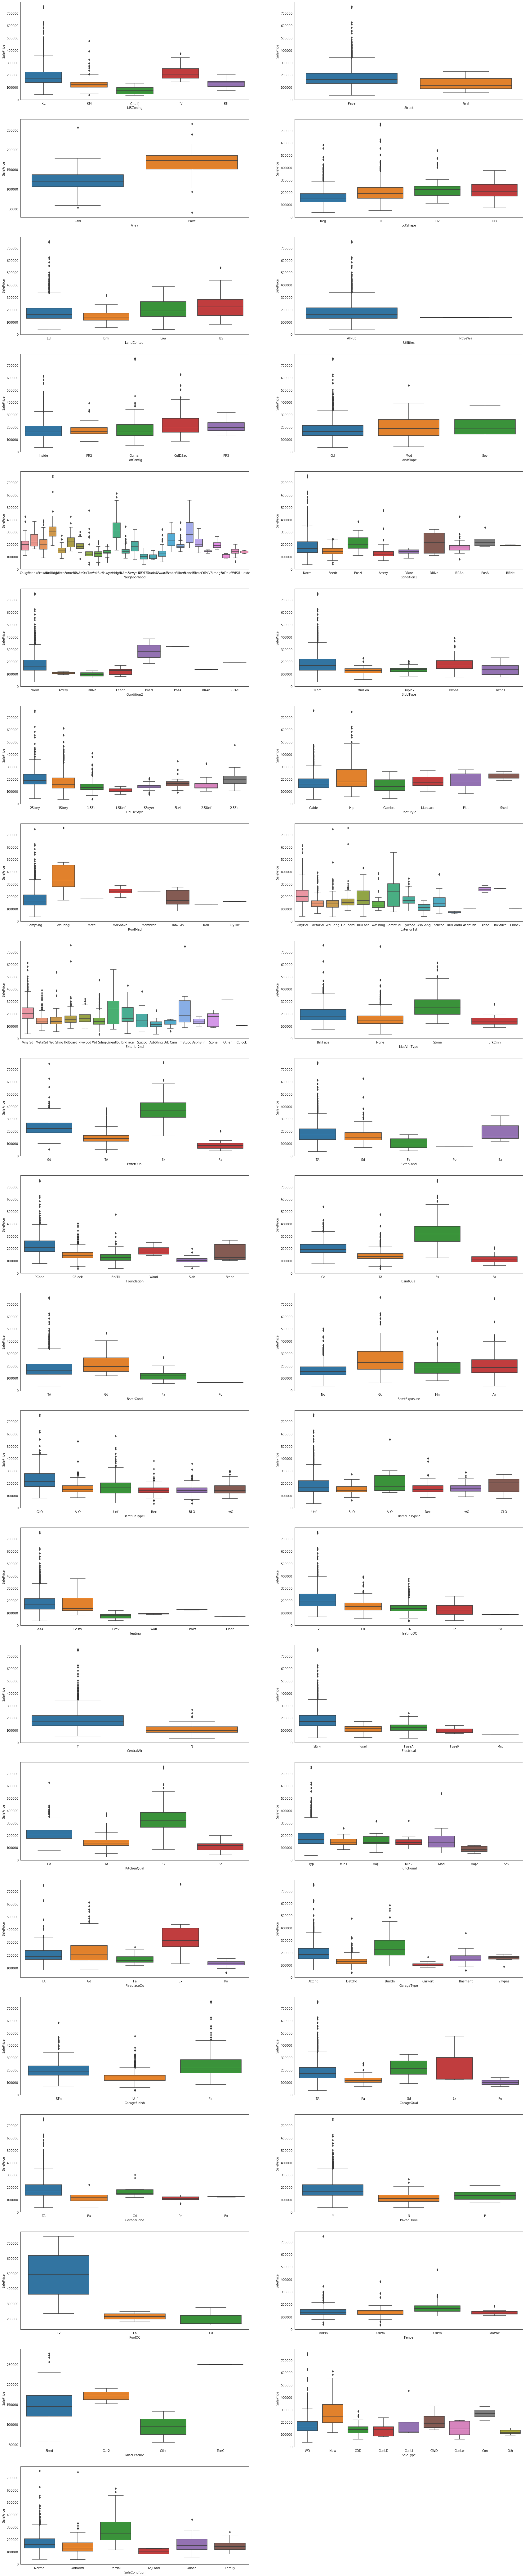

In [15]:
DisplayColumns=2
fig, axes = plt.subplots (ncols=DisplayColumns, nrows=0, figsize=(12, 120))
plt.subplots_adjust (top=2, right=2)
sns.color_palette('RdGy', 10)

for i, feature in enumerate (list(trainDf[CategoricColumns]), 1) :
    plt.subplot (len(list(CategoricColumns)), ColumnDisplay, i )
    sns.boxplot (x=feature, y='SalePrice', data=trainDf, orient='v')

**Observations**

<li>LotShape - Has a lot of overlap across two categories</li>
<li>LandContour - Has a lot of overlap across 4 categories</li>
<li>LotConfig - Has a lot of overlap</li>
<li>LandSlope - Has a lot of overlap</li>
<li>BsmtFinType1 and BsmtFinType2 have lot of overlaps</li>
<li>Functional has overlaps across 7 categories</li>

# 2. Feature Engineering

As part of the Feature Engineering, we need to carry out steps to make the data ready for feeding into the Algorithm.
This will involve the Observations made in the EDA step. Feature Engineering will involve :

Removing Features that do not seem to add value, rather might make the Algorithm pick up the noise
<li>Removing Outliers if required</li>
<li>Finding out NaN (Null) values and see how to update them without distorting the sets</li>
<li>Fixing Skewness of the data</li>

**Let us re-look at the Target once more i.e the SalePrice. We noticed that it had a tail towards the right or in other words it had a positive skew of 1.88.**<br>
Most models do not perform well if the data-distribution is not normal.
So we apply log(1+x) transformation on SalePrice

In [16]:
trainDf['TranSalePrice'] = np.log1p(trainDf['SalePrice'])


In [17]:
trainDf[['Id', 'SalePrice', 'TranSalePrice']].head()

,Id,SalePrice,TranSalePrice
0,1,208500,12.25
1,2,181500,12.11
2,3,223500,12.32
3,4,140000,11.85
4,5,250000,12.43


**Now let us plot the two bar-charts side-by-side to visualize the transformation**

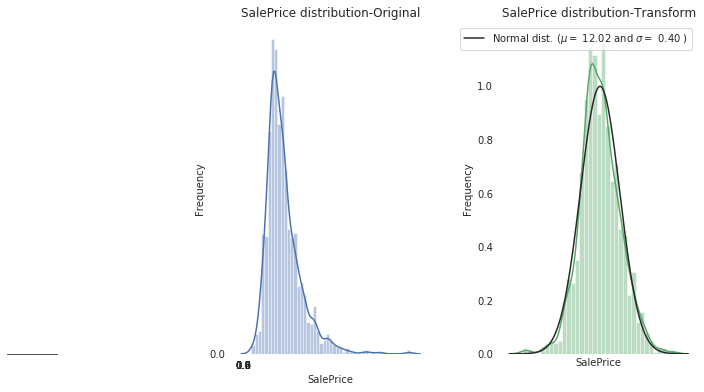

In [18]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(8, 6))

fig.tight_layout(pad=4.0)

#Set the generic properties of Seaborn
sns.set_style("white")
sns.set_color_codes (palette = 'deep')
sns.despine(trim=True, left=True)

# The first distribution plot is for the original SalePrice data
sns.distplot(trainDf['SalePrice'], color="b", ax=axes[0]);
#ax.grid(False)
axes[0].set(ylabel="Frequency")
axes[0].set(xlabel="SalePrice")
#axes[0].xticks(rotation=90)
axes[0].set(title="SalePrice distribution-Original")

# The Second distribution plot is for the original SalePrice data
sns.distplot(trainDf['TranSalePrice'], fit=norm, color="g", ax=axes[1]);
(mu, sigma) = norm.fit(trainDf['TranSalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
#ax.xaxis.grid(False)
axes[1].set(ylabel="Frequency")
axes[1].set(xlabel="SalePrice")
axes[1].set(title="SalePrice distribution-Transform")

plt.show()

**As a Next step, let us merge the Test data with the Train data.**
We can later seperate them out.This will keep the two dataset in sync.
Also the operations can be done in one iteration.

## 2.1 Remove Outliers

In [19]:
# Remove outliers

trainDf.drop(trainDf[(trainDf['GrLivArea']>4000) & (trainDf['SalePrice']<300000)].index, inplace=True)
trainDf.reset_index(drop=True, inplace=True)

**Now let us combine the two datasets into a single dataset**

In [20]:
trainEnd = trainDf.shape[0] #retain the count for segregation in future
CombineDf = pd.concat ([trainDf, testDf], sort=True).reset_index(drop=True)
#trainEnd

In [21]:
CombineDf.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,TranSalePrice,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.00,0.00,GLQ,Unf,1.00,0.00,Gd,150.00,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548.00,2.00,TA,RFn,TA,Attchd,2003.00,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.00,Reg,0,60,RL,196.00,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,208500.00,WD,0,Pave,8,856.00,12.25,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.00,0.00,ALQ,Unf,0.00,1.00,Gd,284.00,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460.00,2.00,TA,RFn,TA,Attchd,1976.00,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.00,Reg,0,20,RL,0.00,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,181500.00,WD,0,Pave,6,1262.00,12.11,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.00,0.00,GLQ,Unf,1.00,0.00,Gd,434.00,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608.00,2.00,TA,RFn,TA,Attchd,2001.00,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.00,IR1,0,60,RL,162.00,BrkFace,NaN,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,223500.00,WD,0,Pave,6,920.00,12.32,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.00,0.00,ALQ,Unf,1.00,0.00,TA,540.00,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642.00,3.00,TA,Unf,TA,Detchd,1998.00,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.00,IR1,0,70,RL,0.00,None,NaN,0,2,Crawfor,35,5,7,Y,0,NaN,CompShg,Gable,Abnorml,140000.00,WD,0,Pave,7,756.00,11.85,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.00,0.00,GLQ,Unf,1.00,0.00,Gd,490.00,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,836.00,3.00,TA,RFn,TA,Attchd,2000.00,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.00,IR1,0,60,RL,350.00,BrkFace,NaN,0,12,NoRidge,84,5,8,Y,0,NaN,CompShg,Gable,Normal,250000.00,WD,0,Pave,9,1145.00,12.43,AllPub,192,2000,2000,2008


In [22]:
CombineDf.drop(['Id', 'SalePrice', 'TranSalePrice'], axis=1, inplace=True)

## 2.1 Dealing with missing Values (NaN)

In [23]:
# Let us check the extent of values that are NaN (missing Values)

# Create a subroutine to list down the NaN % in a tabular form. This subroutine will be invoked multiple times.
def ListEmptiness (df) :
    CombineNaN = (df.isnull().sum()/df.shape[0]) * 100 # Get the % of the Attributes that have Null value
    CombineNaN = CombineNaN[CombineNaN !=0].sort_values(ascending=False)
    nanData = pd.DataFrame({'Nan Ratio': CombineNaN})
    return nanData



In [24]:
Emptyness = ListEmptiness (CombineDf)
#Emptyness

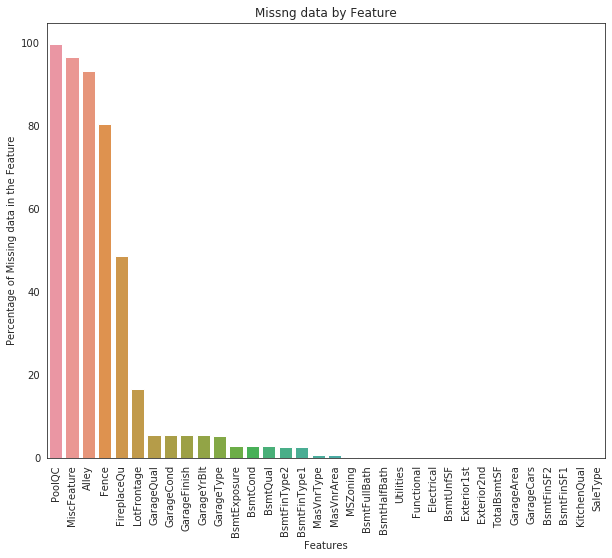

In [25]:
#Visualize the Missing Attributes
f,ax = plt.subplots (figsize=(10,8))
sns.barplot (y='Nan Ratio', x=Emptyness.index, data=Emptyness)
plt.xticks(rotation=90);
plt.ylabel('Percentage of Missing data in the Feature')
plt.xlabel('Features')
plt.title('Missng data by Feature');

### We have to now take the features on a case-by-case basis and handle them.<br>


1. PoolQC

In [26]:
CombineDf['PoolQC'].value_counts(dropna=False).to_frame()

,PoolQC
NaN,2908
Ex,4
Gd,3
Fa,2


A huge majority **(2907 / 2917)** of the housed do not have the value captured for PoolQC. We could have dropped this Feature altogether since we have another Feature called PoolCond
However, we are going to make NaN = "None" for the feature PoolQC. This is as per the Data Description File.
What matters is whether a Pool exist or not

2. PoolArea

In [27]:
CombineDf['PoolArea'].describe()

count   2917.00
mean       2.09
std       34.56
min        0.00
25%        0.00
50%        0.00
75%        0.00
max      800.00
Name: PoolArea, dtype: float64

Based on the above two observation related to Pool (Swimming Pool), it is recommended that the PoolQC be made "none" for the missing values

In [28]:
CombineDf['PoolQC'] = CombineDf['PoolQC'].fillna("None")

2. MiscFeature

In [29]:
CombineDf['MiscFeature'].value_counts(dropna=False).to_frame()

,MiscFeature
NaN,2812
Shed,95
Gar2,5
Othr,4
TenC,1


A huge majority **(2812 / 2917)** of the housed do not have the value captured for MiscFeature. We are going to make NaN = "None" for the feature MiscFeature. This is as per the Data Description File.
**This is also a potential Feature that can be dropped**

In [30]:
CombineDf['MiscFeature'] = CombineDf['MiscFeature'].fillna("None")

3. Alley- No data is construed to be "None"

In [31]:
CombineDf['Alley'] = CombineDf['Alley'].fillna("None")

4. Fence - No data is construed to be "None"

In [32]:
CombineDf['Fence'] = CombineDf['Fence'].fillna ("None")

5. FireplaceQu - Fill the NaNs with "None" as per the data description

In [33]:
CombineDf['FireplaceQu'] = CombineDf['FireplaceQu'].fillna ("None")

6.LotFrontage -<br>
LotFrantage is a Continuous Feature. As per Data Description, it is the Linear feet of street connected to property
It will be tempting to assign the mean value of the dataset to this feature with the missing values.
***However, a better way is to find the Median of each Neighborhood and assign the same to the missing rows based on Neighborhood.***
The assumption being that the LotFrontage will be similar within a Neighborhood.


In [34]:
CombineDf['LotFrontage'] = CombineDf.groupby('Neighborhood')['LotFrontage'].transform (lambda x:x.fillna(x.median()))

7. GarageType<br>
8. GarageFinish<br>
9. GarageQual<br>
10. GarageCond<br>
For the four categorical features above (all related to Garage), NaN mean No Garage. So, empty rows will be filled with "None"

In [35]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
        CombineDf[col] = CombineDf[col].fillna("None")


11. GarageYrBlt<br>
12. GarageArea<br>
13. GarageCars<br>

The above three Numeric Features are filled with 0 for the missing rows. 0 means No Garage.

In [36]:
# Replacing the missing values with 0, since no garage = no cars in garage
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        CombineDf[col] = CombineDf[col].fillna(0)

14. BsmtQual<br>
15. BsmtCond<br>
16. BsmtExposure<br>
17. BsmtFinType1<br>
18. BsmtFinType2<br>

For the above Categorical Features related to Basedment, NaN means No Basement

In [37]:
# NaN values for these categorical basement features, means there's no basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    CombineDf[col] = CombineDf[col].fillna('None')

In [38]:
# Create a Multi-culumn display to visualize same category columns
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
        html_str+="<td>&nbsp&nbsp&nbsp</td>"
    #print(html_str)
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [39]:
display_side_by_side (CombineDf['Electrical'].value_counts(dropna=False).to_frame(), \
                      CombineDf['Functional'].value_counts(dropna=False).to_frame(), \
                      CombineDf['Utilities'].value_counts(dropna=False).to_frame(), \
                      CombineDf['SaleType'].value_counts(dropna=False).to_frame(), \
                      CombineDf['KitchenQual'].value_counts(dropna=False).to_frame()
                     )

Electrical 
 
 
 
 
 SBrkr 
 2669 
 
 
 FuseA 
 188 
 
 
 FuseF 
 50 
 
 
 FuseP 
 8 
 
 
 Mix 
 1 
 
 
 NaN 
 1 
 
 
     
 
 
 
 Functional 
 
 
 
 
 Typ 
 2715 
 
 
 Min2 
 70 
 
 
 Min1 
 65 
 
 
 Mod 
 35 
 
 
 Maj1 
 19 
 
 
 Maj2 
 9 
 
 
 Sev 
 2 
 
 
 NaN 
 2 
 
 
     
 
 
 
 Utilities 
 
 
 
 
 AllPub 
 2914 
 
 
 NaN 
 2 
 
 
 NoSeWa 
 1 
 
 
     
 
 
 
 SaleType 
 
 
 
 
 WD 
 2525 
 
 
 New 
 237 
 
 
 COD 
 87 
 
 
 ConLD 
 26 
 
 
 CWD 
 12 
 
 
 ConLI 
 9 
 
 
 ConLw 
 8 
 
 
 Oth 
 7 
 
 
 Con 
 5 
 
 
 NaN 
 1 
 
 
     
 
 
 
 KitchenQual 
 
 
 
 
 TA 
 1492 
 
 
 Gd 
 1151 
 
 
 Ex 
 203 
 
 
 Fa 
 70 
 
 
 NaN 
 1

19. Electrical<br>
20. Functional<br>
21. Utilities<br>
22. SaleType<br>
23. KitchenQual<br>

The above Features have one or two rows of missing data. The best solution will be to update those with the Mode of the dataset

In [40]:
ColumnList = {'Electrical', 'Functional', 'Utilities', 'SaleType', 'KitchenQual' }
for col in ColumnList :
    #print (CombineDf[col].mode()[0])
    CombineDf[col] = CombineDf[col].fillna (CombineDf[col].mode()[0] )

In [41]:
display_side_by_side (
                      CombineDf['Exterior1st'].value_counts(dropna=False).to_frame(), \
                      CombineDf['Exterior2nd'].value_counts(dropna=False).to_frame() \
                     )

,Exterior1st
VinylSd,1025
MetalSd,450
HdBoard,442
Wd Sdng,411
Plywood,221
CemntBd,125
BrkFace,87
WdShing,56
AsbShng,44
Stucco,42


24. Exterior1st<br>
25. Exterior2nd<br>

The above Features have one or two rows of missing data. The best solution will be to update those with the Mode of the dataset

In [42]:
ColumnList = { 'Exterior1st', 'Exterior2nd' }
for col in ColumnList :
    #print (CombineDf[col].mode()[0])
    CombineDf[col] = CombineDf[col].fillna (CombineDf[col].mode()[0] )

26. BsmtFinSF1<br>
27. BsmtFinSF2<br>
28. BsmtFullBath<br>
29. BsmtHalfBath<br>
30. BsmtUnfSF<br>
31. TotalBsmtSF<br>
Above six numerical Continuous features are updated with zero(0)

In [43]:
CombineDf['BsmtFinSF1' ] = CombineDf['BsmtFinSF1'].fillna(0)

CombineDf['BsmtFinSF2' ] = CombineDf['BsmtFinSF2'].fillna(0)

CombineDf['BsmtFullBath' ] = CombineDf['BsmtFullBath'].fillna(0)
CombineDf['BsmtHalfBath' ] = CombineDf['BsmtHalfBath'].fillna(0)
CombineDf['BsmtUnfSF' ] = CombineDf['BsmtUnfSF'].fillna(0)
CombineDf['TotalBsmtSF' ] = CombineDf['TotalBsmtSF'].fillna(0)


In [44]:
display_side_by_side (CombineDf['MasVnrType'].value_counts(dropna=False).to_frame(), \
                      #CombineDf['MasVnrArea'].value_counts(dropna=False).to_frame(), \
                      CombineDf['MSZoning'].value_counts(dropna=False).to_frame() )

MasVnrType 
 
 
 
 
 None 
 1742 
 
 
 BrkFace 
 879 
 
 
 Stone 
 247 
 
 
 BrkCmn 
 25 
 
 
 NaN 
 24 
 
 
     
 
 
 
 MSZoning 
 
 
 
 
 RL 
 2263 
 
 
 RM 
 460 
 
 
 FV 
 139 
 
 
 RH 
 26 
 
 
 C (all) 
 25 
 
 
 NaN 
 4

32. MasVnrType<br>
33. MasVnrArea<br>
34. MSZoning<br>

The last remaining Features.
MasVnrType - To be filled by the Mode of the dataset
MasVnrArea - To be filled by zero (0)


In [45]:
CombineDf['MasVnrType'] = CombineDf['MasVnrType'].fillna(CombineDf['MasVnrType'].mode()[0])

CombineDf['MasVnrArea'] = CombineDf['MasVnrArea'].fillna(0)

**MSZoning**  
There is no easy way to default this. The best approximation is to take the Mode of each Neighborhood.<br>
This is not a perfect logic, but the this will ensure that for a particular Neighborhood, <br>
if it is primarily Residential, then the default will be Residential, if it is primarily Commercial then the default will be Commercial  and so on.


In [46]:
CombineDf['MSZoning'] = CombineDf.groupby('Neighborhood')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [47]:
# Let's make sure we handled all the missing values

Emptyness = ListEmptiness (CombineDf)
Emptyness

,Nan Ratio


## 2.2 Dealing with Skewed data

In [48]:
NumericColumns = CombineDf.select_dtypes([np.int16, np.int32, np.int64, np.float16, np.float32, np.float64]).columns
#NumericColumns

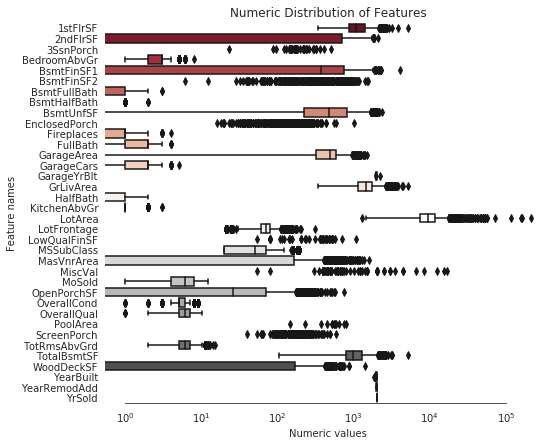

In [49]:
# Create box plots for all numeric features
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=CombineDf[NumericColumns] , orient="h", palette="RdGy")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [50]:
SkewFeatures = CombineDf[NumericColumns].apply(lambda x: skew(x)).sort_values (ascending=False)

HighSkews = SkewFeatures[SkewFeatures > 0.5]
SkewIndex = HighSkews.index

print('There are {} Numerical Features with High Skew Values'.format(SkewIndex.shape[0]))

There are 26 Numerical Features with High Skew Values


**Let us use the scipy function boxcox1p which does Box-Cox transformation**

In [51]:
for i in SkewIndex :
    CombineDf[i] = boxcox1p( CombineDf[i], boxcox_normmax(CombineDf[i] +1) )

In [52]:
SkewFeatures = CombineDf[NumericColumns].apply(lambda x: skew(x)).sort_values (ascending=False)

HighSkews = SkewFeatures[SkewFeatures > 0.5]
SkewIndex = HighSkews.index

print('There are {} Numerical Features with High Skew Values'.format(SkewIndex.shape[0]))

There are 16 Numerical Features with High Skew Values


**By Applying boxcox1p , we have reduced the Skewness of 10 features.**

## 2.2 Create Additional features (including conversion from String/Object type to numeric

1. YearSinceRemodel - Captures how recently the house was touched upon<br>
2. Total Home Quality - It combines OverallQual and OverallCond through a simple addition logic<br>
3. Total Square Ft of the house

In [53]:
CombineDf['YearsSinceRemodel'] = CombineDf['YrSold'].astype(int) - CombineDf['YearRemodAdd'].astype(int)
CombineDf['Total_Home_Quality'] = CombineDf['OverallQual'] + CombineDf['OverallCond']
CombineDf['TotalSF'] = CombineDf['TotalBsmtSF'] + CombineDf['1stFlrSF'] + CombineDf['2ndFlrSF']
CombineDf['Total_Bathrooms'] = (CombineDf['FullBath'] + (0.5 * CombineDf['HalfBath']) +\
                               CombineDf['BsmtFullBath'] + (0.5 * CombineDf['BsmtHalfBath']))

## 2.3 Drop some of the features that are Categorical, String type and having extreme Bias towards one value

In [54]:
CombineDf = CombineDf.drop(['Utilities', 'Street', 'PoolQC',], axis=1)

## 2.4 Get Correlation between Features and also between Features and SalePrice

In [55]:
train= pd.concat([CombineDf.iloc[:trainEnd, :], trainDf['TranSalePrice']], axis=1)
train_corr = train.corr()

### 2.4.1 Visualize the correlation

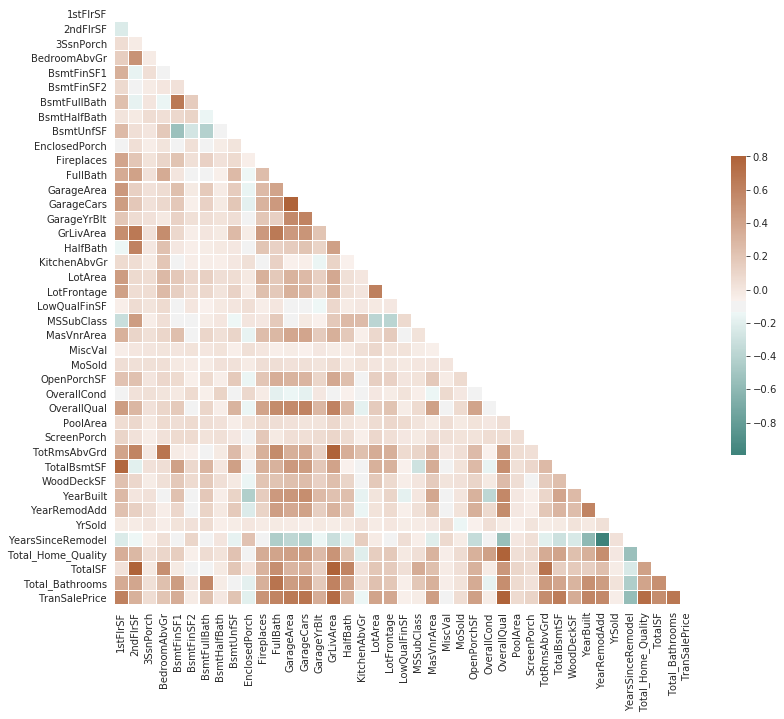

In [56]:
mask = np.zeros_like(train_corr)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette (180, 30, as_cmap=True)

with sns.axes_style("white"):
     fig, ax = plt.subplots(figsize=(13,11))
     sns.heatmap(train_corr, vmax=.8, mask=mask, cmap=cmap, cbar_kws={'shrink':.5}, linewidth=.05);

## 2.5 And Finally the One-hot Encoding for the categorical values of Object/String type

In [57]:
DummyCombineDf = pd.get_dummies(CombineDf)

In [58]:
print ('Shape of the Dataset (Train+ Test) Rows:{}, Columns:{}'.format(DummyCombineDf.shape[0], DummyCombineDf.shape[1]))

Shape of the Dataset (Train+ Test) Rows:2917, Columns:297


**With all Feature Engineering done, we shall split the Combined Dataset into Train and Test as per the original dataset**

In [59]:
X_Train = DummyCombineDf.iloc[ : trainEnd, :]
X_Test  = DummyCombineDf.iloc[trainEnd :, :] 

#y_train = trainDf[['TranSalePrice']]
y_train = trainDf['TranSalePrice'].reset_index(drop=True)

In [60]:
y_train.head(5)

0   12.25
1   12.11
2   12.32
3   11.85
4   12.43
Name: TranSalePrice, dtype: float64

# 3.0 Setting up the Models

In [61]:
#Common Params
Kf = KFold(n_splits=4, random_state=42, shuffle=True) # Number of K-Folds

# Light Gradient Boosting Regressor
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

# XGBoost Regressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
#                       objective='reg:linear',
                       objective='reg:squarederror',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

# Ridge Regressor
#ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
ridge_alphas = [ 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas, cv=Kf))

# Support Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)  

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

# Stack up all the models above, optimized using xgboost
stack_gen = StackingCVRegressor(regressors=(xgboost, lightgbm, svr, ridge, gbr, rf),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [62]:
def cv_rmse(model, TrainFeature, TrainTarget):
    rmse = np.sqrt(-cross_val_score(model, TrainFeature, TrainTarget, scoring="neg_mean_squared_error", cv=Kf))
    return (rmse)

In [63]:

Scores = {}


print("About to start Scoring for First Set Algorithms Time:%s" % datetime.now())
for clf, label in zip([ridge, svr, rf], [ 'Ridge', 'SVM', 'Random Forest']):
    score = cv_rmse(clf, X_Train, y_train)
    print("Neg. MSE Score: %0.4f (+/- %0.4f) [%s] Time::%s" % ( score.mean(), score.std(), label, datetime.now()))
    Scores[label] = (score.mean(), score.std())
    


About to start Scoring for First Set Algorithms Time:2020-05-02 04:37:59.219764
Neg. MSE Score: 0.1112 (+/- 0.0083) [Ridge] Time::2020-05-02 04:38:01.778424
Neg. MSE Score: 0.1112 (+/- 0.0106) [SVM] Time::2020-05-02 04:38:05.682164
Neg. MSE Score: 0.1375 (+/- 0.0090) [Random Forest] Time::2020-05-02 04:39:34.363165


In [64]:
print("About to start Scoring for Second Set Algorithms Time:%s" % datetime.now())

for clf, label in zip([ xgboost, gbr, lightgbm], [ 'xgBoost', 'GradientBooster', 'lightGBM']):
    score = cv_rmse(clf, X_Train, y_train)
    print("Neg. MSE Score: %0.4f (+/- %0.4f) [%s] Time::%s" % ( score.mean(), score.std(), label, datetime.now()))
    Scores[label] = (score.mean(), score.std())

About to start Scoring for Second Set Algorithms Time:2020-05-02 04:39:34.375057
Neg. MSE Score: 0.1395 (+/- 0.0085) [xgBoost] Time::2020-05-02 04:43:38.787258
Neg. MSE Score: 0.1135 (+/- 0.0079) [GradientBooster] Time::2020-05-02 04:45:00.920274
Neg. MSE Score: 0.1176 (+/- 0.0067) [lightGBM] Time::2020-05-02 04:45:15.765050


In [65]:
Scores

{'Ridge': (0.1112063732084963, 0.008335325977086612),
 'SVM': (0.11119010475719833, 0.010569677363415152),
 'Random Forest': (0.13745780590430146, 0.008965115094783883),
 'xgBoost': (0.13951466642800087, 0.008488930832476309),
 'GradientBooster': (0.11346325328793276, 0.007895442295695996),
 'lightGBM': (0.1176153154401591, 0.0067163626524162105)}

# 6.0 Fit the Models

In [66]:
print (X_Train.shape, y_train.shape)

(1458, 297) (1458,)


In [67]:
print('stack_gen Start Time:%s' %  datetime.now())
stack_gen_model = stack_gen.fit(np.array(X_Train), np.array(y_train) )
print('stack_gen End   Time:%s' % datetime.now())

stack_gen Start Time:2020-05-02 04:45:15.795834
stack_gen End   Time:2020-05-02 04:58:33.523657


In [68]:
print('lightgbm Start Time:%s' %  datetime.now())
lightgbm_gen_model = lightgbm.fit(X_Train, y_train )
print('lightgbm End   Time:%s' % datetime.now())

lightgbm Start Time:2020-05-02 04:58:33.534448
lightgbm End   Time:2020-05-02 04:58:37.742236


In [69]:
print('xgBoost Start Time:%s' %  datetime.now())
xgb_gen_model = xgboost.fit(X_Train, y_train )
print('xgBoost End   Time:%s' % datetime.now())

xgBoost Start Time:2020-05-02 04:58:37.752037
xgBoost End   Time:2020-05-02 04:59:57.947509


In [70]:
print('SVR Start Time:%s' %  datetime.now())
svr_gen_model = svr.fit(X_Train, y_train )
print('SVR End   Time:%s' % datetime.now())

SVR Start Time:2020-05-02 04:59:57.956854
SVR End   Time:2020-05-02 04:59:59.311139


In [71]:
print('Ridge Start Time:%s' %  datetime.now())
ridge_gen_model = ridge.fit(X_Train, y_train )
print('Ridge End   Time:%s' % datetime.now())

Ridge Start Time:2020-05-02 04:59:59.323005
Ridge End   Time:2020-05-02 05:00:00.024320


In [72]:
print('Random Forest Start Time:%s' %  datetime.now())
rf_gen_model = rf.fit(X_Train, y_train )
print('Random Forest End   Time:%s' % datetime.now())

Random Forest Start Time:2020-05-02 05:00:00.035884
Random Forest End   Time:2020-05-02 05:00:30.351914


In [73]:
print('GradientBoosting  Start Time:%s' %  datetime.now())
gbr_gen_model = gbr.fit(X_Train, y_train )
print('GradientBoosting  End   Time:%s' % datetime.now())

GradientBoosting  Start Time:2020-05-02 05:00:30.361421
GradientBoosting  End   Time:2020-05-02 05:00:53.653651


### **Blend Models to get a balanced prediction**

In [74]:
# Blend models in order to make the final predictions more robust to overfitting
def blended_predictions(XBlend):
    #print (XBlend.shape)
    #print(XBlend.columns)
    return (   (0.1  * ridge_gen_model.predict(XBlend))  \
             + (0.2  * svr_gen_model.predict(XBlend))  \
             + (0.1  * gbr_gen_model.predict(XBlend)) \
             + (0.1  * xgb_gen_model.predict(XBlend))  \
             + (0.1  * lightgbm_gen_model.predict(XBlend))  \
             + (0.05 * rf_gen_model.predict(XBlend))  \
             + (0.35 * stack_gen_model.predict(np.array(XBlend)))
            )


In [75]:
# Get final precitions from the blended model
print('Blended   Start Time:%s' %  datetime.now())
Blended_Yhat = blended_predictions(X_Train)
print('Blended   End Time:%s' %  datetime.now())



Blended   Start Time:2020-05-02 05:00:53.677481
Blended   End Time:2020-05-02 05:00:58.180181


In [76]:
Blended_Yhat

array([12.23340198, 12.11777268, 12.28435625, ..., 12.44220992,
       11.85490726, 11.90570989])

In [77]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [78]:
blended_score = rmsle(y_train, blended_predictions(X_Train))

Scores['blended'] = (blended_score, 0)
print('RMSLE score on train data:')
print(blended_score)

RMSLE score on train data:
0.07705246210280549


# 7.0 Evaluation of the Models Considered

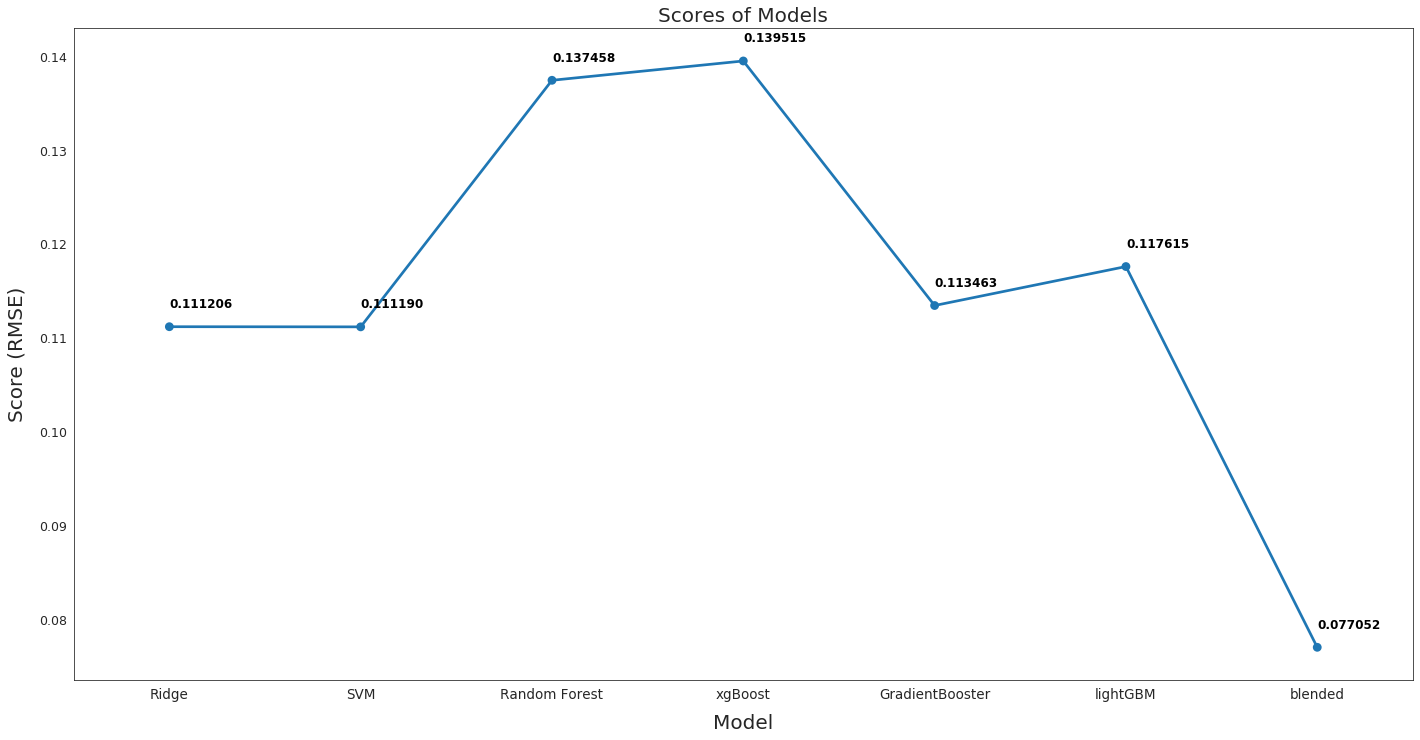

In [79]:
# Plot the predictions for each model
sns.set_style("white")
fig = plt.figure(figsize=(24, 12))

ax = sns.pointplot(x=list(Scores.keys()), y=[score for score, _ in Scores.values()], markers=['o'], linestyles=['-'])
for i, score in enumerate(Scores.values()):
    ax.text(i, score[0] + 0.002, '{:.6f}'.format(score[0]), horizontalalignment='left', size='large', color='black', weight='semibold')

plt.ylabel('Score (RMSE)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)

plt.show()

As depicted in the Graph above, the blended model gives an output whose RMSE is far less compared to individual Models.<br>. Hence we should go with the blended model to predict the outcome

# 8.0 Predict the Test Data 

We shall use the Blended model to first predict the **Normalized** Price

In [80]:
#Apply Prediction to the Test dataset using the best Regression Algorithm (in this case Ridge)
testDf['TranSalePrice'] = blended_predictions(X_Test)

Once the Normalized Price is predicted, we use the **inverse transformation** to derive the Real price from teh Normalized price

In [81]:
#Get the SalePrice via the inverse Normalization tranformation
testDf['SalePrice'] = np.floor(np.expm1(testDf['TranSalePrice']))

Let us look at the Predicted "Normalized Price" and the "Real Price" side-by-side

In [82]:
testDf[['Id', 'TranSalePrice', 'SalePrice']].head(10).style.format({'SalePrice': "{:,.0f}"})

,Id,TranSalePrice,SalePrice
0,1461,11.713309,"122,186"
1,1462,11.980199,"159,562"
2,1463,12.126320,"184,667"
3,1464,12.178599,"194,578"
4,1465,12.158013,"190,614"
5,1466,12.055690,"172,074"
6,1467,12.071281,"174,778"
7,1468,12.016569,"165,472"
8,1469,12.149332,"188,966"
9,1470,11.726386,"123,794"


In [83]:
my_submission = pd.DataFrame({'Id': testDf.Id, 'SalePrice': testDf.SalePrice})
# Use any filename. I choose submission here

my_submission.to_csv('submission.csv', index=False)
